In [33]:
from __future__ import print_function
import numpy as np
import pandas as pd
%matplotlib notebook
# %config InlineBackend.figure_format = 'svg' 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'size': 13,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:
from scipy.constants import codata

In [3]:
au2angs = codata.value( 'atomic unit of length' ) * 1e10

In [5]:
msd_Li_msdconf = np.loadtxt( 'ALLZO/0.125/1000/msd5.dat' )

In [38]:
disps = np.loadtxt('ALLZO/0.125/1000/displong.out')

In [39]:
disps_save = disps

In [40]:
np.shape( disps )

(16808000, 3)

In [41]:
16808000 / 1528

11000

In [45]:
disps = disps.reshape((11000, 1528, 3))

In [46]:
np.shape( disps )

(11000, 1528, 3)

In [47]:
disps_Li = disps[:,-436:,:]

In [48]:
np.shape( disps_Li )

(11000, 436, 3)

In [100]:
def calc_msds( disps, natoms ):
    sum_sq_disps = np.sum( disps ** 2,  axis = 2 )
    ssqd = sum_sq_disps.sum( axis = 1 ) / natoms
#     return np.cumsum( ssqd, axis= 0)
    return ssqd

In [50]:
sq_disps_Li = disps_Li ** 2

In [52]:
sq_sum_disps_Li  = sq_disps_Li.sum( axis=2 )

In [54]:
np.shape( sq_sum_disps_Li )

(11000, 436)

In [55]:
sum_sq_sum_disps_Li = sq_sum_disps_Li.sum( axis=1 )

In [56]:
sum_sq_sum_disps_Li = sum_sq_sum_disps_Li / 436.

In [57]:
np.shape( sum_sq_sum_disps_Li )

(11000,)

In [101]:
msd_Li = calc_msds( disps_Li, 436 )

In [68]:
time = np.arange( 0, len(msd_Li), 1) * 1000 * 41.3414 * 2.418e-5

<IPython.core.display.Javascript object>


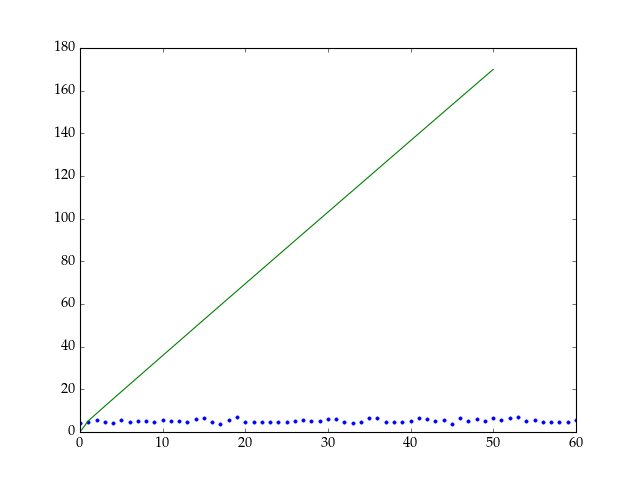

(0.0, 180.0)

In [102]:
plt.figure()
plt.plot( time, msd_Li , '.' )
plt.plot(msd_Li_msdconf[:,0],msd_Li_msdconf[:,1])
plt.xlim( [0.0, 60.])
plt.ylim( [0.0, 180.])

In [70]:
msd_O_msdconf = np.loadtxt('ALLZO/0.125/1000/msd1.dat')

<IPython.core.display.Javascript object>


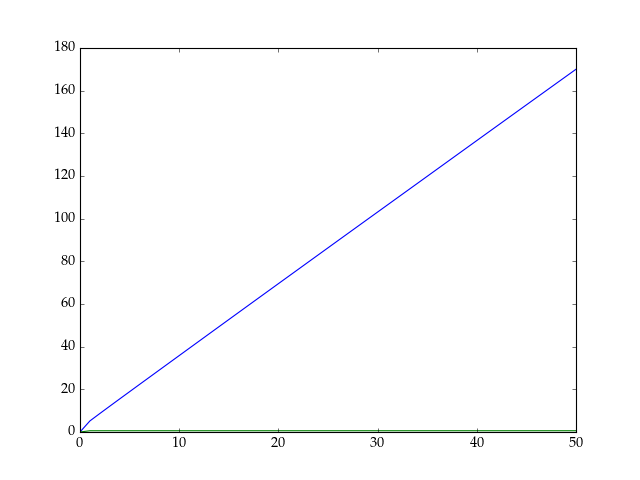

In [85]:
plt.figure()
plt.plot( msd_Li_msdconf[:,0], msd_Li_msdconf[:,1])
plt.plot( msd_O_msdconf[:,0], msd_O_msdconf[:,1])

In [76]:
disps_O = disps[:,:768,:]

In [80]:
msd_O = calc_msds( disps_O, 768)

In [81]:
msd_O

array([  6.24233308e-01,   1.27522671e+00,   1.88906562e+00, ...,
         6.49770610e+03,   6.49830506e+03,   6.49886010e+03])

<IPython.core.display.Javascript object>


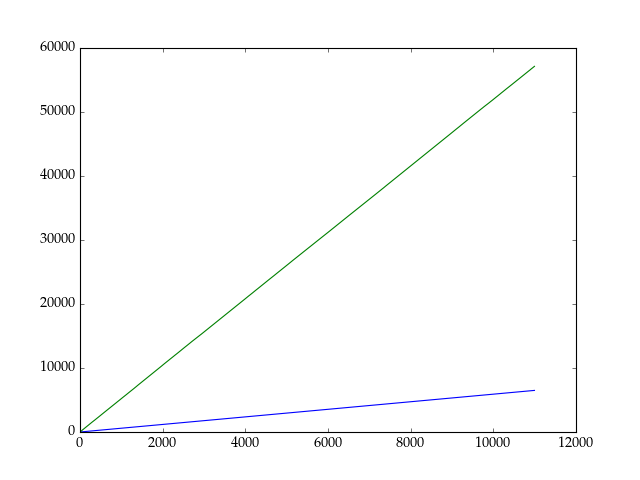

In [84]:
plt.figure()
plt.plot( time, msd_O )
plt.plot( time, msd_Li )
